# <center>Jamboree Business Case Study</center>

## Introduction
- Jamboree is a renowned educational institution that has successfully assisted numerous
 students in gaining admission to top colleges abroad. With their proven
 problem-solving methods, they have helped students achieve exceptional scores on
 exams like GMAT, GRE, and SAT with minimal effort.<br><br>
- To further support students, Jamboree has recently introduced a new feature on their
 website. This feature enables students to assess their probability of admission to Ivy
 League colleges, considering the unique perspective of Indian applicants.

### Problem Statement: 
- Jamboree, an educational institution specializing in helping students with admissions to top colleges abroad, has introduced a feature to assess Ivy League admission chances for Indian applicants. As a data scientist/ML engineer, your task is to analyze the dataset to identify key factors influencing graduate admissions and develop a predictive model to estimate an applicant's admission probability based on various features.

### 1. Basic data cleaning and exploration <br>
The analysis was conducted on the data located at - https://drive.google.com/file/d/1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4/view

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_goldfeldquandt
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('Jamboree.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# As attribute Serial No is irrelevant we can drop.
df = df.drop("Serial No.", axis=1)

In [4]:
df.shape

(500, 8)

- **A quick overview of the data indicates it consists of 500 rows and 8 columns.**

In [5]:
# To check data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [6]:
#To check duplicate values
df.duplicated().sum()

0

In [7]:
#To check missing values
df.isnull().sum() 

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

- **There are no duplicate and missing(null) values present in the dataset.**

In [8]:
#unique records present each column
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [9]:
# Statistical summary of the entire dataset
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### 2. Outlier detection

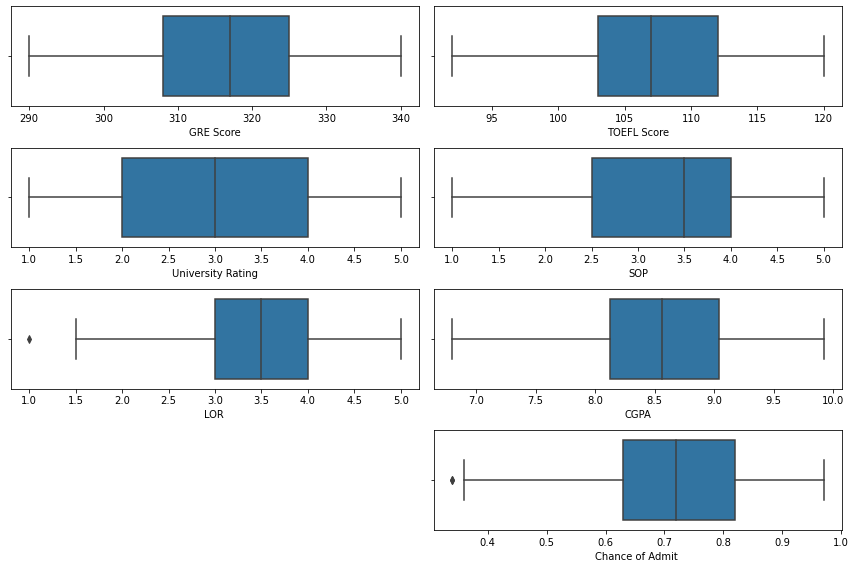

In [10]:
plt.figure(figsize=(12, 8))
# Plot boxplots for each  variable
for i, col in enumerate(df, 1):
    if col == 'Research':
        continue
    plt.subplot(4, 2, i)  # Create a subplot for each variable
    sns.boxplot(x=col, data=df)
    
plt.tight_layout()
plt.show()

**Note:**
- The data shows no significant outliers.

### 3. Univariate Analysis

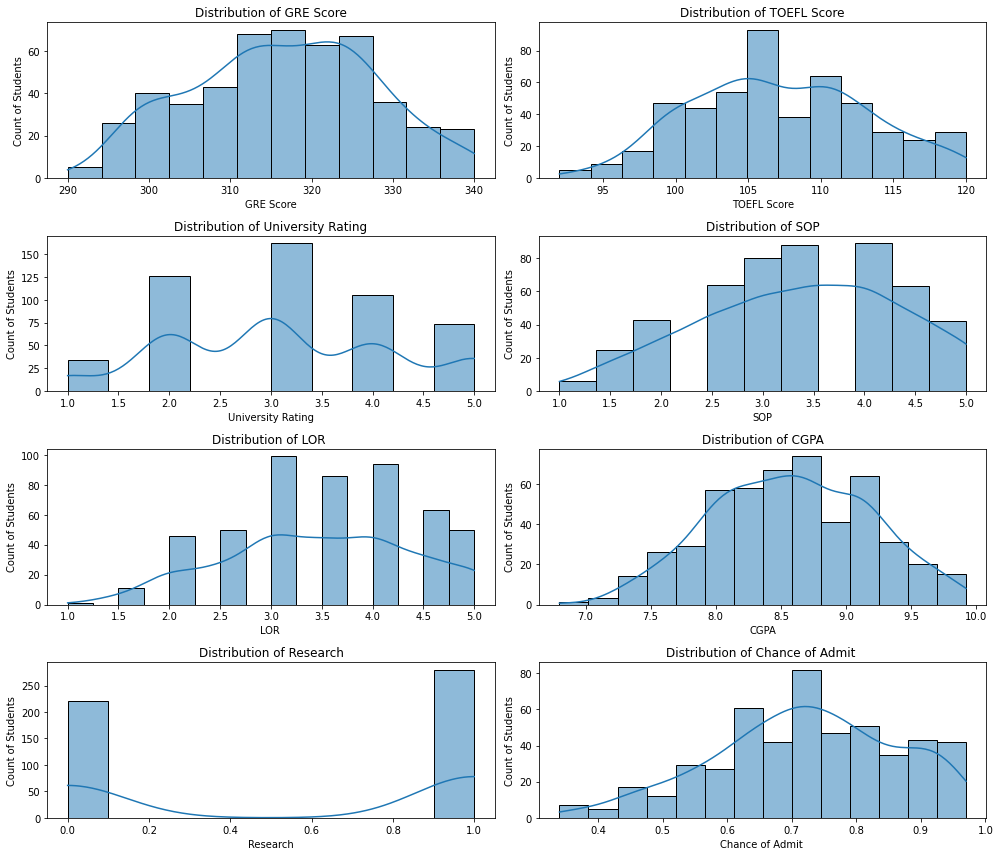

In [11]:
plt.figure(figsize=(14,12))
i=1
for col in df:
    ax=plt.subplot(4,2,i)
    sns.histplot(data=df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count of Students')
    i += 1

plt.tight_layout()
plt.show();

In [12]:
for i in df:
    display(HTML(f"<b>{i}</b>"))
    display(HTML(f'Range of attribute {i} is from <b>{df[i].min()}</b> to <b>{df[i].max()}.</b>'))
    print()

### 4. Bivariate Analysis 

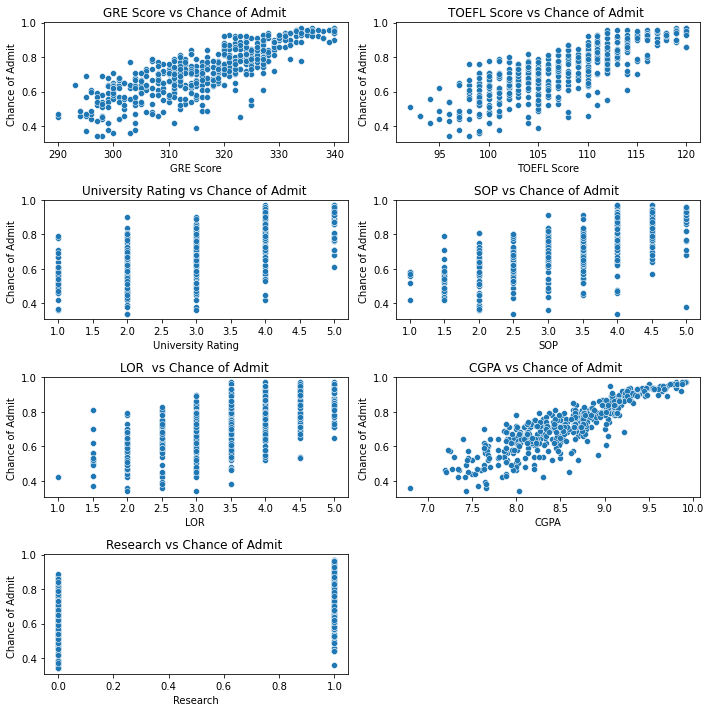

In [13]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
target = 'Chance of Admit '

# Create scatter plots using seaborn
plt.figure(figsize=(10, 10))

for idx, feature in enumerate(features):
    plt.subplot(4, 2, idx + 1)
    sns.scatterplot(x=df[feature], y=df[target])
    plt.title(f'{feature} vs {target}')
    
plt.tight_layout()
plt.show()

1. **GRE Score vs. Chance of Admit**:
   - There is a positive correlation between GRE scores and the chance of admission. As GRE scores increase, the probability of admission also tends to increase.
   - The data points indicate that higher GRE scores are generally associated with higher chances of admission, with most points above 320 showing an increased admit rate.

2. **TOEFL Score vs. Chance of Admit**:
   - Similar to GRE scores, TOEFL scores show a positive correlation with the chance of admission.
   - Applicants with higher TOEFL scores (around 110 and above) are more likely to have a higher chance of admission, indicating that TOEFL performance could be a significant factor in admissions.

3. **University Rating vs. Chance of Admit**:
   - This variable seems to have a less clear linear relationship with the chance of admission, as the data points are somewhat spread out.
   - However, higher university ratings (4 and 5) tend to show a slightly higher concentration of applicants with higher chances of admission.

4. **SOP (Statement of Purpose) vs. Chance of Admit**:
   - The SOP rating does not show a strong trend with the chance of admission, as data points are scattered throughout.
   - However, there is a slight tendency for applicants with higher SOP ratings (4 or 5) to have a slightly higher chance of admission, but it is not as strong as GRE or TOEFL scores.

5. **LOR (Letter of Recommendation) vs. Chance of Admit**:
   - The LOR rating shows a similar pattern to the SOP rating, with a weak correlation with the chance of admission.
   - Higher LOR ratings might slightly increase the chances of admission, but the effect is less pronounced.

6. **CGPA vs. Chance of Admit**:
   - CGPA has a strong positive correlation with the chance of admission, similar to GRE and TOEFL scores.
   - Higher CGPA values (above 8.0) are strongly associated with higher chances of admission, making it an important predictor in the admission process.

7. **Research vs. Chance of Admit**:
   - This plot shows a binary relationship, where applicants who have research experience (1) tend to have a higher chance of admission compared to those without research experience (0).
   - Having research experience appears to positively impact the chance of admission.

### 5. Multivariate analysis

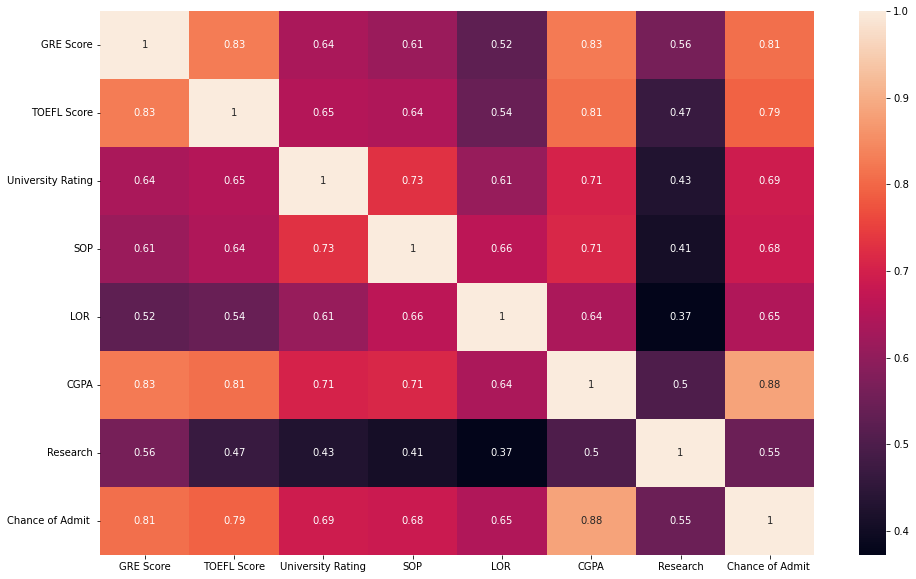

In [14]:
# correlation chart using heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

- The correlation matrix confirms the inferences drawn from the scatterplot, showing that exam scores (CGPA, GRE, and TOEFL) have a strong positive correlation with the chance of admission. Moreover, these exam scores are also highly correlated with each other.

### 6. Prepare the data for modeling.

####  Splitting the dataset into training and testing sets.

In [15]:
# Separate predictor and target variables
X = df.drop(['Chance of Admit '], axis=1) 
y = df[['Chance of Admit ']]

In [16]:
# Split the data into training and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state=42, shuffle = True)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of Y_train: {Y_train.shape}')
print(f'Shape of Y_test: {Y_test.shape}')

Shape of X_train: (400, 7)
Shape of X_test: (100, 7)
Shape of Y_train: (400, 1)
Shape of Y_test: (100, 1)


In [17]:
#Normalization/Standardization
scaler = MinMaxScaler()

In [18]:
# Applying MinMaxScaler: Fitting and Transforming on Training Data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns, index=X_train.index )
X_train_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,0.62,0.678571,0.50,0.625,0.714286,0.650641,1.0
433,0.52,0.678571,0.75,0.750,1.000000,0.557692,0.0
19,0.26,0.357143,0.50,0.625,0.428571,0.544872,0.0
322,0.48,0.535714,0.25,0.375,0.714286,0.471154,0.0
332,0.36,0.500000,0.50,0.625,0.285714,0.451923,1.0


In [19]:
# Applying MinMaxScaler: Fitting and Transforming on Testing Data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.88,0.857143,0.75,0.750,0.571429,0.878205,1.0
1,0.48,0.571429,0.75,0.875,0.714286,0.717949,1.0
2,0.50,0.464286,0.25,0.250,0.285714,0.272436,0.0
3,0.44,0.607143,0.50,0.500,0.428571,0.605769,0.0
4,0.72,0.714286,0.50,0.625,0.428571,0.721154,1.0


### 7. Linear Regression Modeling

#### 7.1) Building the Linear Regression Model with Scikit-Learn

In [20]:
# Fitting the model to the training data
lr_model = LinearRegression()
lr_model.fit(X_train_scaled,Y_train)

LinearRegression()

In [21]:
# Predicting values for the training and test data
y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)

In [22]:
def model_evaluation(y_actual, y_forecast, model):
    n = len(y_actual)  # Number of samples
    if len(model.coef_.shape)==1:
        p = len(model.coef_)
    else:
        p = len(model.coef_[0])
    
    # Calculate metrics
    MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast), 2)
    MSE = np.round(mean_squared_error(y_true= y_actual, y_pred=y_forecast, squared=True), 4)
    RMSE = np.round(mean_squared_error(y_true=y_actual, y_pred=y_forecast, squared=False), 2)
    R2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast), 2)
    adj_r2 = np.round(1 - ((1 - R2) * (n - 1) / (n - p - 1)), 2)
    
    return {
        "MAE": MAE,
        "MSE": MSE,
        "RMSE": RMSE,
        "R² Score": R2,
        "Adjusted R² Score": adj_r2
    }


In [23]:
# Metrics for training data
model_evaluation(Y_train.values, y_pred_train, lr_model)

{'MAE': 0.04,
 'MSE': 0.0035,
 'RMSE': 0.06,
 'R² Score': 0.82,
 'Adjusted R² Score': 0.82}

In [24]:
# Metrics for testing data
model_evaluation(Y_test.values, y_pred_test, lr_model)

{'MAE': 0.04,
 'MSE': 0.0037,
 'RMSE': 0.06,
 'R² Score': 0.82,
 'Adjusted R² Score': 0.81}

In [25]:
# Displaying model coefficients(weights)
for feature, weight in zip(X_train.columns, lr_model.coef_[0]):
    print(f"Weight of {feature}: {np.round(weight, 2)}")


Weight of GRE Score: 0.12
Weight of TOEFL Score: 0.08
Weight of University Rating: 0.01
Weight of SOP: 0.01
Weight of LOR : 0.06
Weight of CGPA: 0.35
Weight of Research: 0.02


In [26]:
# Bias Term of the Model

lr_model.intercept_

array([0.35558405])

### Insights:

- **Error Metrics:** The MAE, MSE, and RMSE values for both the training and testing datasets are very close, indicating that the model generalizes well and is not overfitting the training data.

- **R² and Adjusted R² Scores:** Both scores are high (around 0.82 for training and 0.81 for testing), suggesting that the model explains a significant portion of the variance in the target variable. The slight decrease in the R² and Adjusted R² scores from training to testing indicates a minor drop in performance, which is typical in regression models.

- Overall, the **Linear Regression model** shows strong predictive capabilities, effectively balancing bias and variance. The metrics demonstrate that the model is robust and reliable for making predictions on new, unseen data, making it suitable for deployment in practical applications.

#### 7.2) Building the Linear Regression Model with Statsmodels

In [27]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train_scaled)
# Fit the model
model_results = sm.OLS(Y_train, X_train_const).fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          3.41e-142
Time:                        12:47:26   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3556      0.01

### Considering a significance value of 0.05, dropping columns with p-values greater than 0.05.

- Variables like **GRE Score, TOEFL Score, CGPA, LOR and Research** have p-values less than 0.05, indicating they are statistically significant predictors of the chance of admission.

- **University Rating and SOP** have p-values > 0.05, indicating they are not statistically significant at the 0.05 level. Therefore, we can drop both variables and re-build the model.

In [28]:
# Drop the columns from X_train_scaled and X_test_scaled
X_train_scaled.drop(['University Rating', 'SOP'], axis=1, inplace=True)
X_test_scaled.drop(['University Rating', 'SOP'], axis=1, inplace=True)


#### 7.3) Rebuilding the Linear Regression Model with Statsmodels

In [29]:
# rebuilding the Linear regression model from statsmodels.api

X_train_const = sm.add_constant(X_train_scaled)
# Fit the model
model_results = sm.OLS(Y_train, X_train_const).fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          1.36e-144
Time:                        12:47:26   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3550      0.010     37.131      

#### 7.4) Rebuilding the Linear regression model using sk-learn library

In [30]:
# Fitting the model to the training data

lr_model.fit(X_train_scaled,Y_train)

# Predicting values for the training and test data
Y_pred_train = lr_model.predict(X_train_scaled)
Y_pred_test = lr_model.predict(X_test_scaled)

In [31]:
# Metrics for training data
model_evaluation(Y_train.values, Y_pred_train, lr_model)


{'MAE': 0.04,
 'MSE': 0.0035,
 'RMSE': 0.06,
 'R² Score': 0.82,
 'Adjusted R² Score': 0.82}

In [32]:
# Metrics for testing data
model_evaluation(Y_test.values, Y_pred_test, lr_model)

{'MAE': 0.04,
 'MSE': 0.0038,
 'RMSE': 0.06,
 'R² Score': 0.82,
 'Adjusted R² Score': 0.81}

In [33]:
# Displaying model coefficients(weights)
for feature, weight in zip(X_train.columns, lr_model.coef_[0]):
    print(f"Weight of {feature}: {np.round(weight, 2)}")


Weight of GRE Score: 0.12
Weight of TOEFL Score: 0.09
Weight of University Rating: 0.07
Weight of SOP: 0.36
Weight of LOR : 0.02


In [34]:
# Bias Term of the Model

lr_model.intercept_

array([0.35498373])

**Insights**
- **No Significant Performance Loss:** The model's evaluation metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R² Score, and Adjusted R² Score, remained virtually unchanged after dropping these features. This suggests that University Rating and SOP did not contribute much predictive power to the model.
- **Adjusted R² Score Consistency:** The stability of the Adjusted R² Score implies that dropping University Rating and SOP didn’t negatively affect the model’s explanatory power. This score adjusts for the number of predictors in the model, reinforcing that these features were likely noise rather than true predictors.
- Overall, removing University Rating and SOP seems to have improved model efficiency without sacrificing performance, resulting in a more robust and interpretable linear regression model for this case study.

### 8. Test the assumptions of linear regression.

**8.1) Multicollinearity:**
  - Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, meaning they provide similar information.
  - VIF(Variance Inflation Factor) is a measure used to detect multicollinearity. It quantifies how much the variance of a regression coefficient(weights) is inflated due to the correlation with other independent variables.

In [35]:
# Initialize a DataFrame for VIF
vif = pd.DataFrame()
vif['Variable'] = X_train_scaled.columns

# Calculate VIF for each feature
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

# Display VIF results
print(vif)

      Variable        VIF
0    GRE Score  31.084729
1  TOEFL Score  25.856292
2         LOR    9.190136
3         CGPA  35.922075
4     Research   3.320373


- We observe that nearly all variables, except for Research, exhibit a high degree of collinearity. This aligns with the findings from the correlation heatmap, which indicated strong positive correlations among GRE Score, TOEFL Score, and CGPA.

**8.2) Mean of residuals.**

- Residuals in regression analysis represent the difference between the observed values and the predicted values of the target variable. The mean of residuals represents the average of residual values in a regression model. In simple terms, a residual is the error or the amount by which the model's prediction deviates from the actual data point.

- Formula:
   - Residual = Actual value (y) - Predicted value (ŷ)

In [36]:
residuals = Y_test.values - Y_pred_test
print('Mean of Residuals: ', residuals.mean())


Mean of Residuals:  -0.005305947942348672


- The mean of residuals being close to zero is a positive indication that our linear regression model has a reasonably balanced fit. 

**8.3) Linear relationship between independent & dependent variables.**

- In linear regression, the linearity assumption means that the independent variables should have a straight-line relationship with the dependent variable. The effect of the independent variables should remain constant as they change.

- When we talk about "no pattern in the residual plot," it means the differences between the actual and predicted values (residuals) should be randomly scattered around zero. This indicates that the model has captured the linear relationship well.

- However, if the residuals show a clear pattern (like a curve, U-shape, or funnel shape), it suggests the model is missing some non-linear relationships or has other issues. In these cases, adjustments like transformations, adding polynomial terms, or trying a different model may be needed to improve the fit.

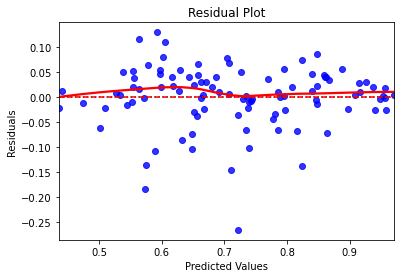

In [37]:
# Residual plot
plt.figure(figsize=(6, 4))
sns.residplot(x=y_pred_test, y=residuals, lowess=True, color='blue', line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

- As residual plot shows no clear pattern or trend in residuals, we can conclude there is Linear relationship between independent & dependent variables.

**8.4) Homoscedasticity**

- Homoscedasticity in regression analysis means that the variance of residuals (errors) remains constant across all levels of independent variables. In simple terms, the spread of residuals should be similar regardless of predictor values. When homoscedasticity is violated, it leads to biased and unreliable regression estimates. <br><br>

- To test for homoscedasticity:
  - Residual plot: Check for consistent spread of residuals across predicted values or predictors.
  - Scatterplot: Plot residuals against each independent variable separately to identify trends.
  - Breusch-Pagan Test: Statistical test for homoscedasticity (p-value > 0.05 suggests no violation).
  - Goldfeld-Quandt Test: Compares residual variances in data subsets to detect differences.

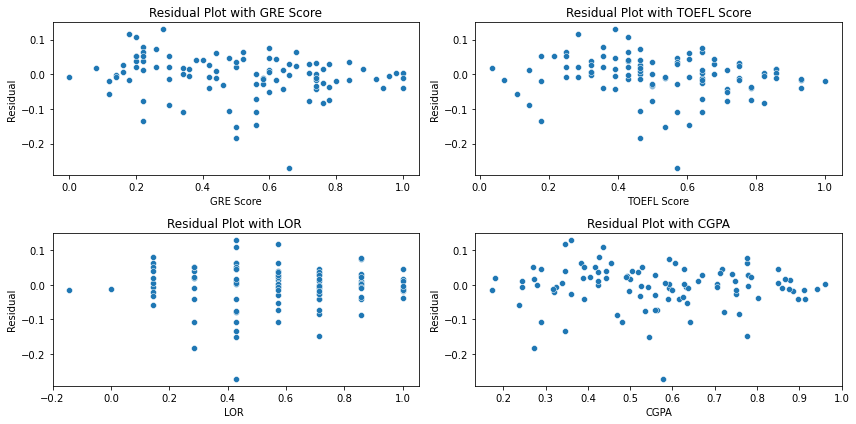

In [38]:
# Scatterplot of residuals with each independent variable to check for Homoscedasticity
plt.figure(figsize=(12,6))
i=1
for col in X_test_scaled.columns[:-1]:
    ax = plt.subplot(2,2,i)
    sns.scatterplot(x=X_test_scaled[col].values.reshape((-1,)), y=residuals.reshape((-1,)))
    plt.title(f'Residual Plot with {col}')
    plt.xlabel(col)
    plt.ylabel('Residual')
    i+=1

plt.tight_layout()
plt.show();

Since there is no notable variation in the spread of residuals as the independent variables change, we can say that the assumption of homoscedasticity is satisfied.

**Goldfeld-Quandt Test**


**Formulating Hypothesis:**
- Null Hypothesis(H0): The residuals have constant variance (homoscedasticity).
- Alternative Hypothesis(Ha): The residuals have non-constant variance (heteroscedasticity). The test can check for increasing or decreasing variance across the data.

In [39]:
# Perform Goldfeld-Quandt Test
X_test_const = sm.add_constant(X_test_scaled)
# Reset index for both Y_test and X_test_const to ensure they are aligned
Y_test = Y_test.reset_index(drop=True)
X_test_const = X_test_const.reset_index(drop=True)

gq_test = het_goldfeldquandt(Y_test, X_test_const)
# Output the results
p_val = gq_test[1]
print(f"F-statistic: {gq_test[0]}")
print(f"P-value: {p_val}")



F-statistic: 0.5970049723189744
P-value: 0.9546659405917642


In [40]:
if p_val > 0.05:
    print('We fail to reject Ho: The residuals have constant variance (homoscedasticity).')
else:
    print('Reject H0: The residuals have non-constant variance (heteroscedasticity).')

We fail to reject Ho: The residuals have constant variance (homoscedasticity).


- Therefore we can conclude that the assumption of homoscedasticity is satisfied.

**8.5) Normality of residuals**
- Normality of residuals refers to the assumption that the residuals (or errors) in a statistical model are normally distributed. Residuals are the differences between the observed values and the predicted values from the model.
- The assumption of normality is important in many statistical analyses because it allows for the application of certain statistical tests and the validity of confidence intervals and hypothesis tests. When residuals are normally distributed, it implies that the errors are random, unbiased, and have consistent variability.

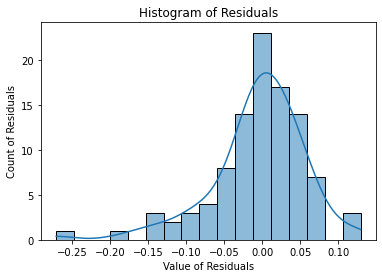

In [41]:
#Histogram of Residuals
sns.histplot(residuals.reshape((-1,)), kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show();

D:\anac\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


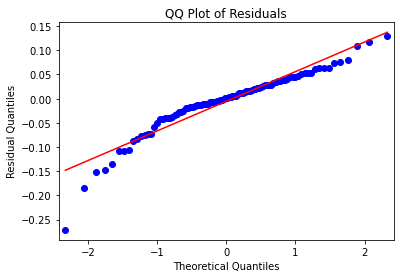

In [42]:
# QQ-Plot of residuals
sm.qqplot(residuals.reshape((-1,)), line = 's')
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
plt.show();

- The residuals are approximately normally distributed, supporting the validity of the linear regression model. Minor deviations in the lower range indicate a few larger-than-expected negative residuals, suggesting slight skewness or potential outliers. Overall, the model is reliable and well-suited for the data, with minor areas for potential refinement. Further adjustments may be considered if accuracy in the lower range is crucial.

### 9. Visualizing y_test and y_pred_test to assess prediction spread

Text(0, 0.5, 'Y_pred_test')

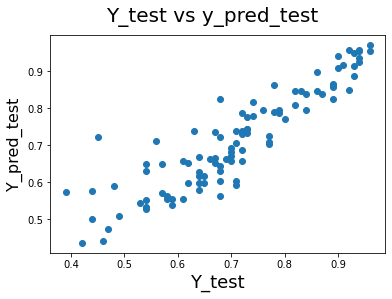

In [43]:
# Plotting y_test and y_pred_test to understand the spread.
fig = plt.figure()
plt.scatter(Y_test.values, y_pred_test)
fig.suptitle('Y_test vs y_pred_test', fontsize=20) 
plt.xlabel('Y_test', fontsize=18)
plt.ylabel('Y_pred_test', fontsize=16) 

In this case study, based on our scatter plot, it seems that the model performs better (i.e, predictions are more accurate) when the values of the exam scores are higher, while there is more scatter (i.e., less accurate predictions) for lower exam score values. This can suggest that the model might not be fully capturing the relationship between the predictors (exam scores) and the target variable for lower values of the predictors.

#### 9.1) Can we implement using Polynomial Regression?
Yes, **polynomial regression** might help in such situations where there is non-linearity in the relationship between the predictors and the target variable. For lower exam scores, if the relationship is not purely linear, using a polynomial transformation can allow the model to fit the data more closely.

#### Steps to Take:
1. **Add Polynomial Terms**: Start with a low degree (e.g., degree = 2) and use cross-validation to ensure you're not overfitting the model.
2. **Regularization**: If adding polynomial terms, consider using Ridge or Lasso regression to prevent overfitting, especially with high-degree polynomial terms.

In summary, since the model struggles with lower values of exam scores, adding polynomial features might improve the predictions by capturing more complex relationships in the data.

### 10. Polynomial Regression

In [44]:
X.drop(['University Rating', 'SOP'], axis=1, inplace=True)
#Splitting dataset into train,validation and test set
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [45]:
print("X_train:",X_train.shape)
print("X_val:",X_val.shape)
print("X_test",X_test.shape)

X_train: (300, 5)
X_val: (100, 5)
X_test (100, 5)


In [46]:
def adj_r2(X,Y, r2):

    res = (1 - ((1-r2)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
    return res

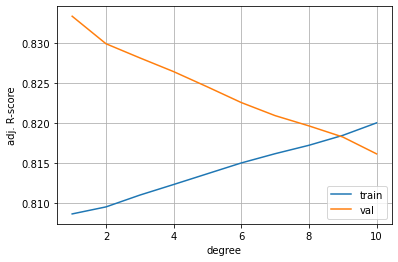

In [47]:
#To get best degree of polynomial
max_degree = 11 # max polynomial degree

train_scores = []
val_scores = []

scaler = StandardScaler()


for degree in range(1, max_degree):

    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
    polyreg_scaled.fit(X_train, y_train)

    train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
    val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))

    train_scores.append(train_score)
    val_scores.append(val_score)

plt.figure()
plt.plot(list(range(1, max_degree)), train_scores, label="train")
plt.plot(list(range(1, max_degree)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [48]:
val_scores[:5]
np.argmax(val_scores)

0

In [49]:
val_scores[8]

0.818216839842065

In [50]:
train_scores = []
val_scores = []

lambda_list = np.arange(0.01, 10, 0.1) # [0.01, 0.1, 1, 5, 10]

for rate in lambda_list:
    polyreg_scaled = make_pipeline(PolynomialFeatures(8), StandardScaler(), Ridge(alpha=rate))
    polyreg_scaled.fit(X_train, y_train)

    train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
    val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))

    train_scores.append(train_score)
    val_scores.append(val_score)

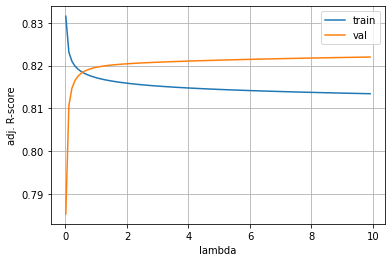

In [51]:
plt.figure()
plt.plot(lambda_list, train_scores, label="train")
plt.plot(lambda_list, val_scores, label="val")
plt.legend()
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [52]:
final_model = make_pipeline(PolynomialFeatures(8), StandardScaler(), Ridge(alpha=0.2))

final_model.fit(X_train, y_train)


train_score = adj_r2(X_train, y_train, final_model.score(X_train, y_train))
print(f'Training Score = {train_score}')

val_score = adj_r2(X_val, y_val, final_model.score(X_val, y_val))
print(f'Validation Score = {val_score}')

Training Score = 0.8211525603608538
Validation Score = 0.814504193226637


In [53]:
test_score = adj_r2(X_test, y_test, final_model.score(X_test, y_test))
print(f'Testing Score = {test_score}')
y_pred_t = final_model.predict(X_test)
a= np.mean(y_test - y_pred_t)
a

Testing Score = 0.8143497030918623


Chance of Admit    -0.001859
dtype: float64

Text(0, 0.5, 'Y_pred_test')

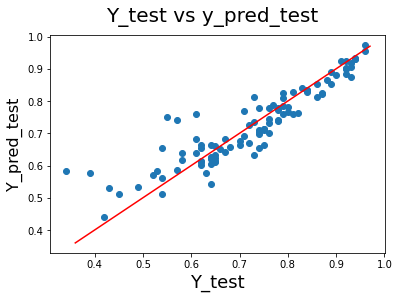

In [54]:
actual_values = y_train.values
fig = plt.figure()
plt.scatter(y_test.values, y_pred_t)
plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
fig.suptitle('Y_test vs y_pred_test', fontsize=20) 
plt.xlabel('Y_test', fontsize=18)
plt.ylabel('Y_pred_test', fontsize=16)

**Conclusion:**<br>
Despite implementing a polynomial regression model to potentially improve predictions for lower exam score values, both the linear and polynomial models exhibit similar performance and visual patterns. This indicates that the relationship between exam scores and the target variable is sufficiently captured by the linear model, suggesting that added complexity may not be necessary. Further investigation into additional features or modeling techniques may be warranted to enhance predictions for lower score ranges.


### Inferences and Report

1. **Dataset Overview**:
   - The dataset contains **500 records** and **8 features**, including GRE Score, TOEFL Score, University Rating, SOP (Statement of Purpose), LOR (Letter of Recommendation), CGPA, Research Experience, and the target variable, Chance of Admit.
   - There were no missing or duplicate values, and the data was well-prepared for analysis.<br><br>

2. **Key Features and Statistical Summary**:
   - **GRE Score** ranges from 290 to 340, and **TOEFL Score** ranges from 92 to 120, indicating a wide variation in applicant performance.
   - **CGPA** has a strong positive correlation with the Chance of Admit, followed closely by GRE and TOEFL scores.
   - **Research Experience** (binary: 0 or 1) also shows a positive influence on the likelihood of admission.<br><br>

3. **Feature Impact Analysis**:
   - Features like **CGPA, GRE Score, TOEFL Score, LOR,** and **Research** were identified as the most significant predictors of the Chance of Admit based on their high coefficients in the regression models.
   - Features such as **University Rating** and **SOP** had lower statistical significance and were excluded in the refined model for better efficiency and interpretability.<br><br>

4. **Model Evaluation and Performance**:
   - The Linear Regression model achieved an **R² Score of 0.82**, indicating that the model explains 82% of the variance in the target variable (Chance of Admit).
   - Error metrics such as **Mean Absolute Error (MAE), Mean Squared Error (MSE),** and **Root Mean Squared Error (RMSE)** were consistent across both training and testing datasets, suggesting the model generalizes well and is not overfitting.
   - The stability of the **Adjusted R² Score** (0.81) further confirms that the model’s performance remained robust after dropping non-significant features.<br><br>

5. **Multicollinearity and Model Refinement**:
   - High VIF values for features like GRE Score, TOEFL Score, and CGPA indicated multicollinearity, which was addressed by carefully selecting features based on significance (p-values).
   - The refined model excluded **University Rating** and **SOP**, leading to improved interpretability without sacrificing predictive power.<br><br>

6. **Residual Analysis and Model Assumptions**:
   - Residual analysis showed no clear pattern, supporting the linearity assumption of the model.
   - Homoscedasticity was confirmed using the Goldfeld-Quandt Test, and residuals were approximately normally distributed, validating the model's assumptions.
   - The model performed well across different ranges of exam scores, although it showed slightly less accuracy for lower scores, suggesting potential benefits from polynomial regression for future iterations.<br><br>

7. **Overall Model Insights**:
   - The final model is reliable and suitable for predicting the Chance of Admit based on the key academic and research-related features.
   - Despite exploring polynomial regression, the added complexity did not yield significant performance gains, indicating that the linear model sufficiently captures the relationships in the data.<br><br>



### Actionable Insights and Recommendations 

1. **Focus on Key Predictors for Admissions**:
   - Features like **GRE Score, TOEFL Score, CGPA, LOR (Letter of Recommendation), and Research** experience were found to have the most significant impact on predicting the chance of admission. Emphasize these factors in admissions guidance to help students improve their profiles.<br><br>

2. **Streamline the Application Process**:
   - Since features like **University Rating and SOP** did not contribute significantly to the model’s predictive power, Jamboree can consider de-emphasizing these factors in admissions consulting. This streamlining could simplify the application preparation process for students.<br><br>

3. **Enhance Support for Lower Scoring Students**:
   - The model performed well for higher exam scores but struggled with lower score predictions. Jamboree should consider offering targeted interventions or preparatory programs for students with lower scores to boost their admission chances.<br><br>

4. **Leverage Research Experience in Student Profiles**:
   - Students with research experience show a higher probability of admission. Encourage students to engage in research projects or internships, as this can positively impact their chances, especially for competitive universities.<br><br>

5. **Regularly Update the Predictive Model**:
   - Admissions criteria and trends can evolve. Implement a continuous monitoring process and periodically retrain the model with updated data to ensure it reflects the latest admissions patterns and provides accurate guidance.<br><br>

6. **Consider Additional Features for Future Models**:
   - Although the current model captures the main predictors well, exploring additional features (e.g., extracurricular activities, essay quality, work experience) may enhance prediction accuracy, particularly for students with lower academic scores.<br><br>

7. **Implement a Feedback Loop for Model Improvement**:
   - Establish a feedback mechanism with admissions consultants to identify discrepancies between predictions and actual admissions outcomes. Use this feedback to refine the model and adjust feature importance based on new insights.<br><br>

8. **Simplify Student Guidance Based on Model Insights**:
   - Based on the model’s findings, emphasize GRE, TOEFL, and CGPA as primary focus areas for students aiming to improve their chances of admission. Tailor your guidance programs to help students maximize their scores in these areas.<br><br>

